In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from lib.loads import parse_loads, convert_offline_to_online_input
from lib.model import build_model, FACEBOOK_2009_0, FACEBOOK_2009_1, ENERGY_MODEL_WIERMAN
from lib.utils import summarize_distribution, plot_cdf, plot

In [3]:
# import logging

# FORMAT = '%(levelname)s %(name)s %(asctime)-15s %(filename)s:%(lineno)d %(message)s'
# logging.basicConfig(format=FORMAT)
# logging.getLogger().setLevel(logging.INFO)

In [4]:
TIME_SLOT_LENGTH = 10 * 60
NORMALIZED_SWITCHING_COST = 1
REVENUE_LOSS = 0.1

In [5]:
TRACE = FACEBOOK_2009_1

# Model

In [6]:
model = build_model(
  TRACE,
  ENERGY_MODEL_WIERMAN,
  TIME_SLOT_LENGTH,
  NORMALIZED_SWITCHING_COST,
  REVENUE_LOSS,
)

# Inputs

In [7]:
offline_input = parse_loads(TRACE)
perfect_knowledge_online_input = convert_offline_to_online_input(offline_input)

# Execute

## Offline

In [8]:
from lib.offline import evaluate_1d

opt, iopt, runtime_opt, runtime_iopt = evaluate_1d(model, offline_input)

INFO soco.bindings.data_center.offline 2021-07-29 21:20:01,913 offline.rs:60 1d Graph Search
INFO soco.streaming.offline 2021-07-29 21:20:01,917 offline.rs:45 Generated a problem instance: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 144, bounds: [600], switching_cost: [6.0] }
INFO soco.streaming.offline 2021-07-29 21:20:01,920 offline.rs:47 Simulating until time slot 144.
INFO soco.streaming.offline 2021-07-29 21:20:07,053 offline.rs:54 Completed with Cost { cost: 3164486.1677754554, output: Success(DataCenterModelOutputSuccess { energy_cost: 2623800.0, revenue_loss: 535658.1677754553, assignments: [[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [

In [9]:
from lib.offline import evaluate_static

opts, iopts, runtime_opts, runtime_iopts = evaluate_static(model, offline_input)

INFO soco.bindings.data_center.offline 2021-07-29 21:45:05,473 offline.rs:148 Static Integral
INFO soco.streaming.offline 2021-07-29 21:45:05,475 offline.rs:45 Generated a problem instance: SmoothedConvexOptimization { d: 1, t_end: 144, bounds: [(0.0, 600.0)] }
INFO soco.streaming.offline 2021-07-29 21:45:05,477 offline.rs:47 Simulating until time slot 144.
INFO soco.streaming.offline 2021-07-29 23:05:37,442 offline.rs:54 Completed with Cost { cost: 6412267.89636118, output: Success(DataCenterModelOutputSuccess { energy_cost: 6092487.1008, revenue_loss: 319357.70617917954, assignments: [[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]]

### Fractional vs Integral

In [10]:
opt_vs_iopt = iopt / opt
opts_vs_iopts = iopts / opts
opt_vs_iopt, opts_vs_iopts

(1.0004740891153996, 1.0010771763087432)

### Opt vs OptS

In [11]:
opt_vs_opts = opts / opt
iopt_vs_iopts = iopts / iopt
opt_vs_opts, iopt_vs_iopts

(2.0272826432626347, 2.028504692102021)

### Runtimes

In [12]:
runtime_opt, runtime_iopt, runtime_opts, runtime_iopts

(1498251, 5061, 4831859, 40296)

### Approximation algorithm

In [13]:
gammas = np.logspace(
  0.2, 3, 8, base=2
)
gammas

array([1.14869835, 1.51571657, 2.        , 2.63901582, 3.48220225,
       4.59479342, 6.06286627, 8.        ])

In [14]:
from lib.offline import evaluate_approx_graph_search

x, y, approx_opt_runtimes = evaluate_approx_graph_search(model, offline_input, gammas)

INFO soco.bindings.data_center.offline 2021-07-29 23:06:18,425 offline.rs:108 Approximate Graph Search
INFO soco.streaming.offline 2021-07-29 23:06:18,427 offline.rs:45 Generated a problem instance: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 144, bounds: [600], switching_cost: [6.0] }
INFO soco.streaming.offline 2021-07-29 23:06:18,428 offline.rs:47 Simulating until time slot 144.
DEBUG soco.algorithms.offline.multi_dimensional.approx_graph_search 2021-07-29 23:06:18,429 approx_graph_search.rs:57 starting with `70` values
DEBUG soco.algorithms.offline.multi_dimensional.graph_search 2021-07-29 23:06:18,431 graph_search.rs:58 from time slot `1` to time slot `144`
INFO soco.streaming.offline 2021-07-29 23:06:28,386 offline.rs:54 Completed with Cost { cost: 3174439.3546687365, output: Success(DataCenterModelOutputSuccess { energy_cost: 2619000.0, revenue_loss: 550441.3546687365, assignments: [[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]],

DEBUG matplotlib.font_manager 2021-07-29 23:08:43,466 font_manager.py:1329 findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG matplotlib.font_manager 2021-07-29 23:08:43,468 font_manager.py:1341 findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG matplotlib.font_manager 2021-07-29 23:08:43,469 font_manager.py:1341 findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG matplotlib.font_manager 2021-07-29 23:08:43,469 font_manager.py:1341 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG matplotlib.font_manager 2021-07-29 23:08:43,470 font_manager.py:1341 findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG matplotlib.font_manager 2021-07-29 23:08:43,471 font_manager.py:1341 findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal

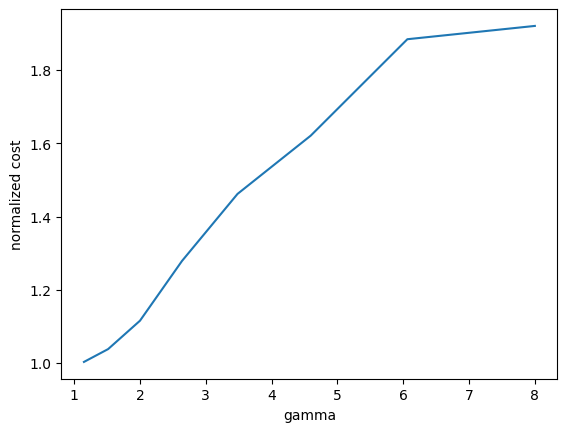

In [18]:
# plt.axhline(y=iopt, color='r', linestyle='-')
plot(x, np.array(y) / iopt, 'gamma', 'normalized cost', 'approx_graph_search')
plt.show()

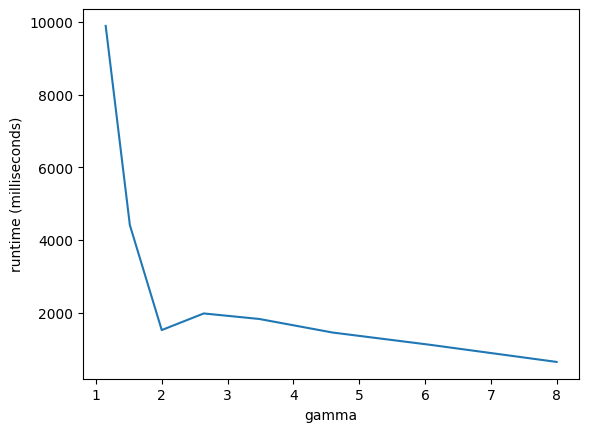

In [19]:
plot(x, approx_opt_runtimes, 'gamma', 'runtime (milliseconds)', 'approx_graph_search_runtime')
plt.show()

## Online

In [ ]:
from lib.online import evaluate_fractional_lazy_capacity_provisioning

initial_alg, alg, initial_ialg, ialg, energy_cost, revenue_loss, switching_cost, initial_runtime, runtimes = evaluate_fractional_lazy_capacity_provisioning(model, [], perfect_knowledge_online_input)

  0%|          | 0/144 [00:00<?, ?it/s]The inputs have prediction window `144` which is not used completely by the algorithm with prediction window `0`. Consider using a different algorithm.
The inputs have prediction window `144` which is not used completely by the algorithm with prediction window `0`. Consider using a different algorithm.
  1%|▏         | 2/144 [00:00<00:17,  8.04it/s]The inputs have prediction window `144` which is not used completely by the algorithm with prediction window `0`. Consider using a different algorithm.
The inputs have prediction window `144` which is not used completely by the algorithm with prediction window `0`. Consider using a different algorithm.
The inputs have prediction window `144` which is not used completely by the algorithm with prediction window `0`. Consider using a different algorithm.
  6%|▌         | 8/144 [00:09<04:43,  2.09s/it]The inputs have prediction window `144` which is not used completely by the algorithm with prediction windo

In [ ]:
alg, ialg, energy_cost, revenue_loss, switching_cost

(2329341.0483287754,
 2334953.9999999995,
 1987200.0,
 347615.99999999977,
 137.99999999976717)

## Evaluation

### Competitive Ratio

In [ ]:
cr = alg / opt
icr = ialg / iopt
cr, icr

(77.07722248206338, 77.13925740921768)

### Competitive Difference

In [ ]:
cd = alg - opt
icd = ialg - iopt
cd, icd

(240631238.60905376, 240941626.89616418)

### Regret

In [ ]:
regret = alg - opts
iregret = ialg - iopts
regret, iregret

(240348033.31218106, 237686938.02451518)

### Cost Change

Regret relative to overall cost.

In [ ]:
rel_regret = regret / opts
rel_iregret = iregret / iopts
rel_regret, rel_iregret

(69.74307799711626, 37.027645540855396)

Competitive difference relative to overall cost.

In [ ]:
rel_cd = cd / opt
rel_icd = icd / iopt
rel_cd, rel_icd

(76.07722248206338, 76.13925740921768)

### Fractional vs Integral

In [ ]:
alg_vs_ialg = ialg / alg
alg_vs_ialg

1.0012793076240865

### Runtime

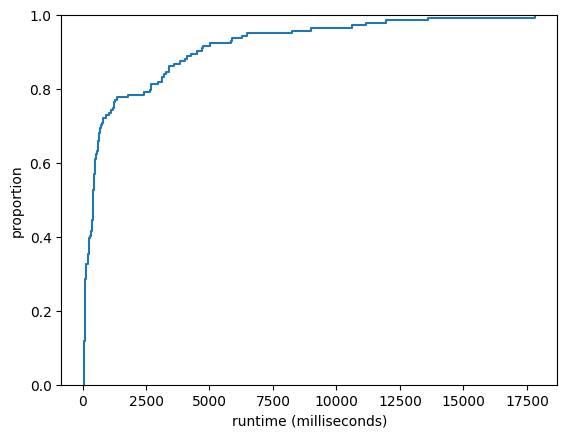

DistributionSummary(mean=1527.861111111111, median=411.5, modes=array([104]), std=2817.0858923991514, mad=320.0, min_=51, p25=107.75, p75=1197.5, max_=17808)

In [ ]:
runtimes_np = np.array(runtimes)
plot_cdf(runtimes_np, 'runtime (milliseconds)', 'online_runtime')
plt.show()
summarize_distribution(runtimes_np)

### Model

Proportion of energy cost to delay cost

In [ ]:
ec_vs_rl = energy_cost / revenue_loss if revenue_loss > 0 else np.Inf
hc_vs_sc = (energy_cost + revenue_loss) / switching_cost
ec_vs_rl, hc_vs_sc

(5.338836412572872, 631.4025333393946)